<a href="https://colab.research.google.com/github/khushi0patel/traffic_sign_prediction/blob/main/traffic_signal_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Patel Khushi s.

Enrollment no.:18012011071

Subject:Deep Learning

CE-B[AB5]

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam


In [ ]:
plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [ ]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'
test_path = '../input/gtsrb-german-traffic-sign/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [ ]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

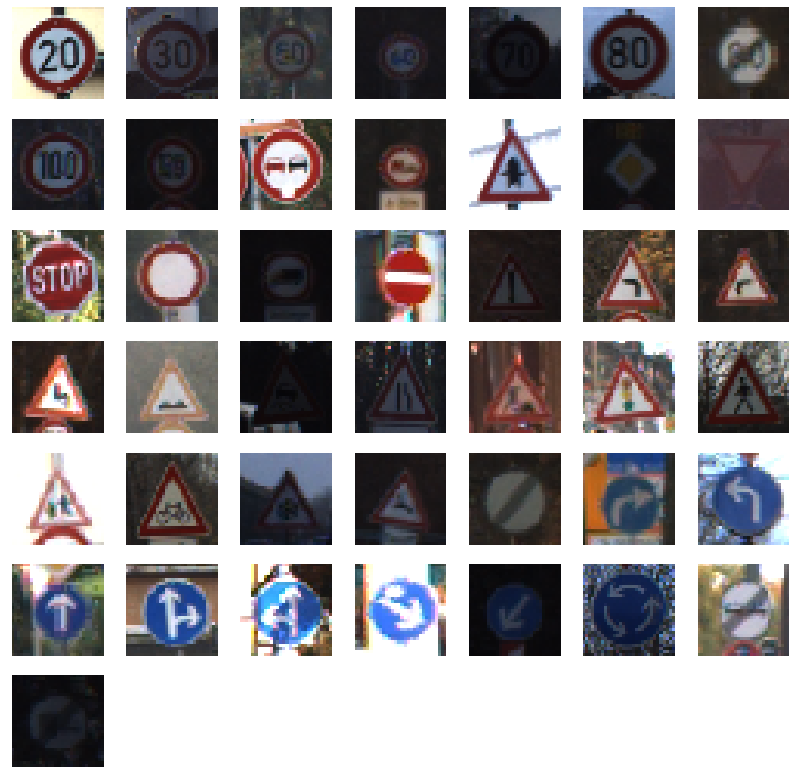

In [ ]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

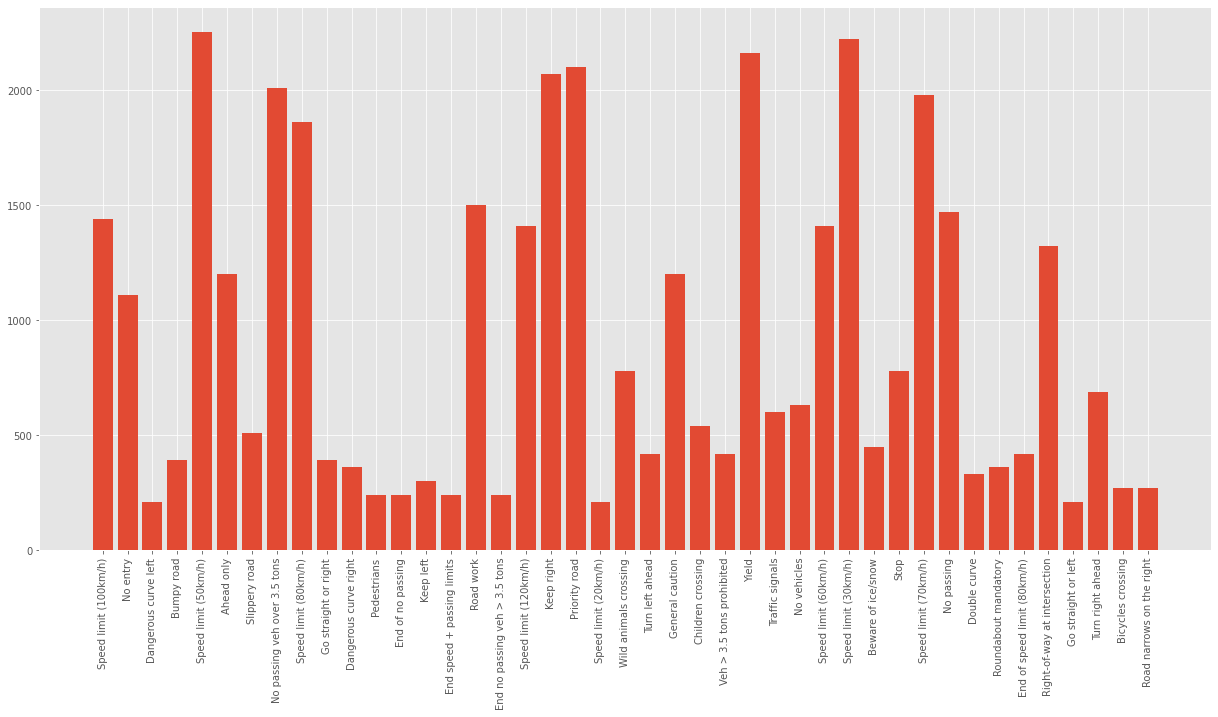

In [ ]:
folders = os.listdir(train_path)


train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(data_dir):


    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [ ]:
images, labels = load_data(train_path)

In [ ]:
labels = to_categorical(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

In [ ]:
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (27446, 30, 30, 3)
Number of images in x_train 27446
Number of images in x_test 11763


In [ ]:
print('x_train shape:',x_test.shape)

x_train shape: (11763, 30, 30, 3)


In [ ]:
input_shape=( 30, 30, 3)

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compiling the model


lr = 0.001
epochs = 30
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [ ]:
history = model.fit(x_train, y_train,validation_split=0.3,epochs=20)

2021-12-12 12:58:46.272851: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
601/601 [==============================] - 13s 21ms/step - loss: 1.8947 - accuracy: 0.4677 - val_loss: 0.6646 - val_accuracy: 0.8070
Epoch 2/20
601/601 [==============================] - 11s 19ms/step - loss: 0.5478 - accuracy: 0.8283 - val_loss: 0.2960 - val_accuracy: 0.9235
Epoch 3/20
601/601 [==============================] - 12s 19ms/step - loss: 0.3163 - accuracy: 0.9017 - val_loss: 0.1871 - val_accuracy: 0.9500
Epoch 4/20
601/601 [==============================] - 12s 20ms/step - loss: 0.2245 - accuracy: 0.9303 - val_loss: 0.1492 - val_accuracy: 0.9630
Epoch 5/20
601/601 [==============================] - 11s 19ms/step - loss: 0.1818 - accuracy: 0.9419 - val_loss: 0.1294 - val_accuracy: 0.9658
Epoch 6/20
601/601 [==============================] - 13s 21ms/step - loss: 0.1375 - accuracy: 0.9566 - val_loss: 0.1034 - val_accuracy: 0.9752
Epoch 7/20
601/601 [==============================] - 12s 19ms/step - loss: 0.1227 - accuracy: 0.9607 - val_loss: 0.0973 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

368/368 [==============================] - 2s 5ms/step - loss: 0.0690 - accuracy: 0.9804
test set accuracy:  98.04471731185913


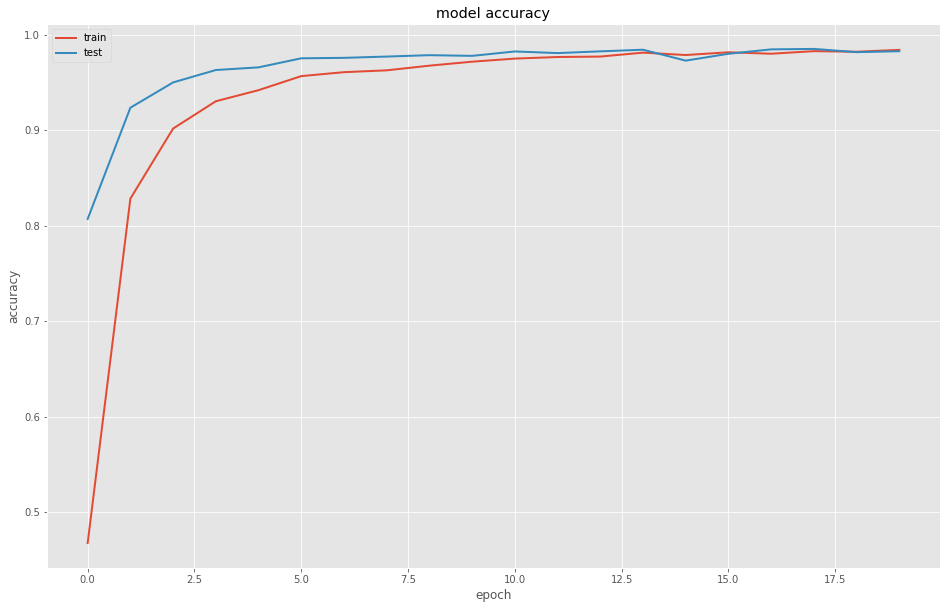

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

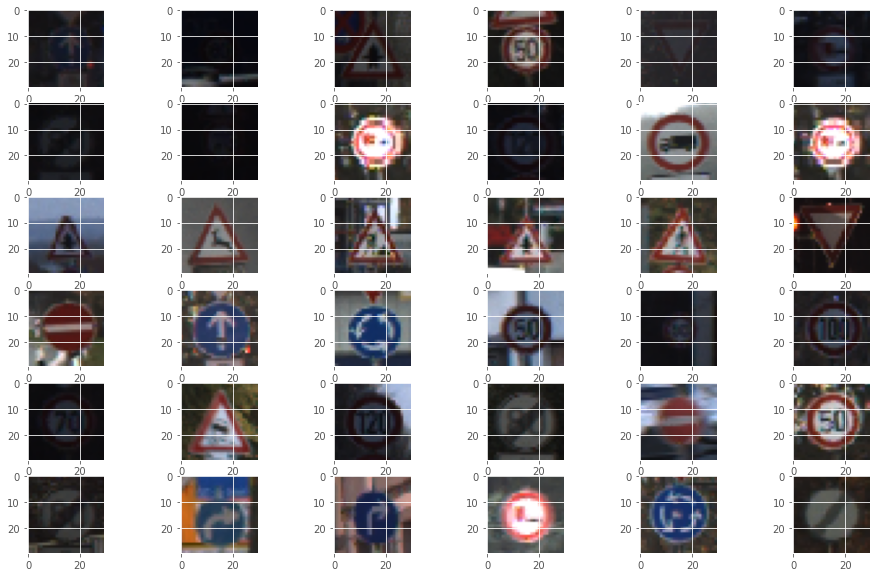

In [ ]:
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(x_test[i])

In [ ]:
image_index=0

2700
The predicted image is Ahead only


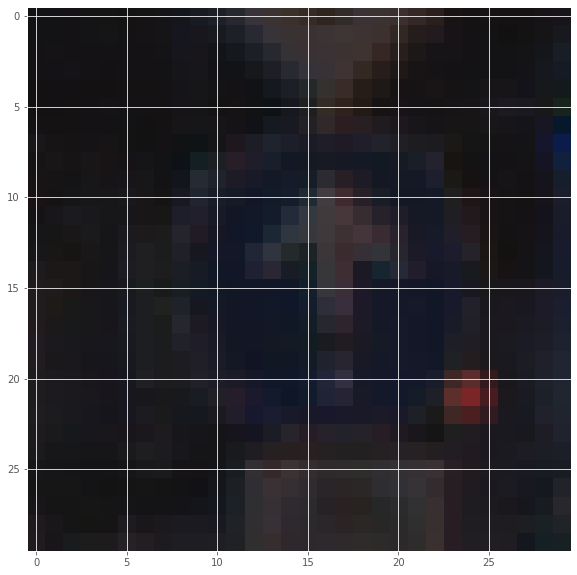

In [ ]:
plt.imshow(x_test[image_index])
n = np.array(x_test[image_index])
print(n.size)
p = n.reshape(1, 30, 30, 3)
pred = classes[model.predict(p).argmax()]

print("The predicted image is {}".format(pred))